In [ ]:
%pip install keras

In [2]:
import numpy as np 
import os
import keras
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import pickle

In [8]:
path1 = []
path2 = []
path3 = []
path4 = []
for dirname, _, filenames in os.walk('D:/College-works/Sem 5/Software/Software_engineering/health_predictor/ml_models/alzheimers/Data/Non Demented'):
    for filename in filenames:
        path1.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('D:/College-works/Sem 5/Software/Software_engineering/health_predictor/ml_models/alzheimers/Data/Mild Dementia'):
    for filename in filenames:
        path2.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('D:/College-works/Sem 5/Software/Software_engineering/health_predictor/ml_models/alzheimers/Data/Moderate Dementia'):
    for filename in filenames:
        path3.append(os.path.join(dirname, filename))
        
for dirname, _, filenames in os.walk('D:/College-works/Sem 5/Software/Software_engineering/health_predictor/ml_models/alzheimers/Data/Very mild Dementia'):
    for filename in filenames:
        path4.append(os.path.join(dirname, filename))    

In [15]:
path1 = path1[0:200]
path2 = path2[0:200]
path3 = path3[0:200]
path4 = path4[0:200]

In [16]:
encoder = OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia

OneHotEncoder()

In [17]:
data = []
result = []
for path in path1:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())
        
for path in path2:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray()) 
        
for path in path3:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for path in path4:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())  

In [18]:
data = np.array(data)
data.shape

(400, 128, 128, 3)

In [19]:
result = np.array(result)
result = result.reshape((400,4))
result.shape

(400, 4)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(data,result,test_size=0.15,shuffle = True,random_state=42)

In [22]:
model = Sequential()

model.add(Conv2D(32,kernel_size =(2,2),input_shape = (128,128,3),padding = 'Same'))
model.add(Conv2D(32,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))
model.add(Conv2D(64,kernel_size =(2,2),activation='relu',padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides = (2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
          
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4,activation='softmax'))
          
model.compile(loss = 'categorical_crossentropy',optimizer = 'Adamax',metrics=['accuracy'])
          
print(model.summary())




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)      

In [23]:
y_train.shape

(340, 4)

In [24]:
x_train.shape

(340, 128, 128, 3)

In [25]:
history = model.fit(x_train,y_train,epochs = 10,batch_size=10,verbose=1,validation_data=(x_test,y_test))

Epoch 1/10


34/34 [==============================] - 17s 453ms/step - loss: 15.9519 - accuracy: 0.6765 - val_loss: 1.4693 - val_accuracy: 0.7167
Epoch 2/10
34/34 [==============================] - 16s 463ms/step - loss: 0.2303 - accuracy: 0.9853 - val_loss: 8.9407e-08 - val_accuracy: 1.0000
Epoch 3/10
34/34 [==============================] - 16s 457ms/step - loss: 0.1181 - accuracy: 0.9912 - val_loss: 1.7087e-07 - val_accuracy: 1.0000
Epoch 4/10
34/34 [==============================] - 16s 461ms/step - loss: 0.1153 - accuracy: 0.9882 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/10
34/34 [==============================] - 15s 447ms/step - loss: 0.0500 - accuracy: 0.9971 - val_loss: 4.9670e-08 - val_accuracy: 1.0000
Epoch 6/10
34/34 [==============================] - 15s 457ms/step - loss: 2.2653e-06 - accuracy: 1.0000 - val_loss: 5.9605e-09 - val_accuracy: 1.0000
Epoch 7/10
34/34 [==============================] - 15s 444ms/step - loss: 0.0206 - accuracy: 0.9941 - val_loss: 1.

In [13]:
# model.save("model.h5")  

In [26]:
import joblib
filename = "alzheimers_model.sav"
joblib.dump(model, filename)

['alzheimers_model.sav']

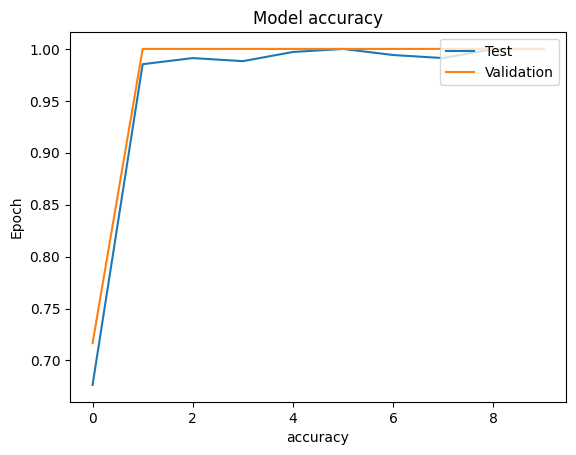

In [27]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('accuracy')
plt.ylabel('Epoch')
plt.legend(['Test','Validation'],loc='upper right')
plt.show()

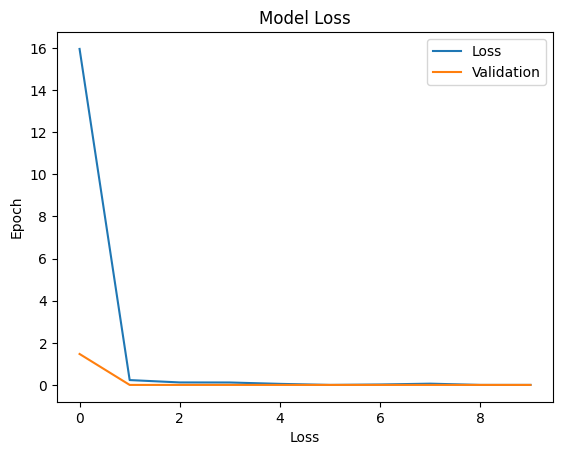

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Loss')
plt.ylabel('Epoch')
plt.legend(['Loss','Validation'],loc='upper right')
plt.show()

In [17]:
def names(number):
    if number == 0:
        return 'Non Demented'
    elif number == 1:
        return 'Mild Dementia'
    elif number == 2:
        return 'Moderate Dementia'
    elif number == 3:
        return 'Very Mild Dementia'
    else:
        return 'Error in Prediction'
# 0 --> Non Demented
# 1 --> Mild Dementia
# 2 --> Moderate Dementia
# 3 --> Very Mild Dementia    

100.0% Confidence This Is Moderate Dementia


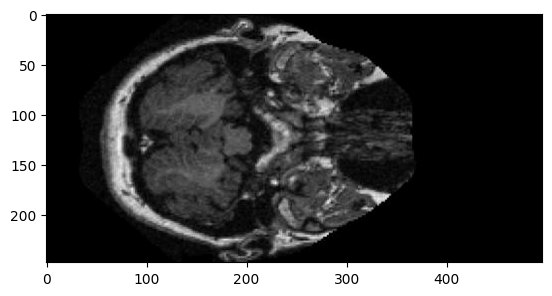

In [18]:
from matplotlib.pyplot import imshow
img = Image.open(r'D:/Sem 4/Bio/Project/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_101.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

100.0% Confidence This Is Very Mild Dementia


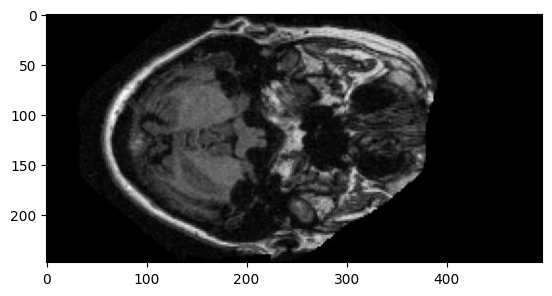

In [19]:
img = Image.open(r'D:/Sem 4/Bio/Project/Data/Very mild Dementia/OAS1_0003_MR1_mpr-1_117.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

100.0% Confidence This Is Mild Dementia


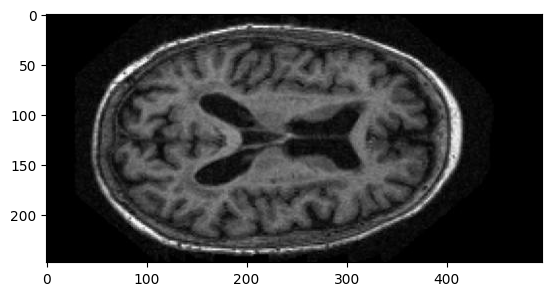

In [20]:
img = Image.open(r'D:/Sem 4/Bio/Project/Data/Mild Dementia/OAS1_0028_MR1_mpr-1_145.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

100.0% Confidence This Is Moderate Dementia


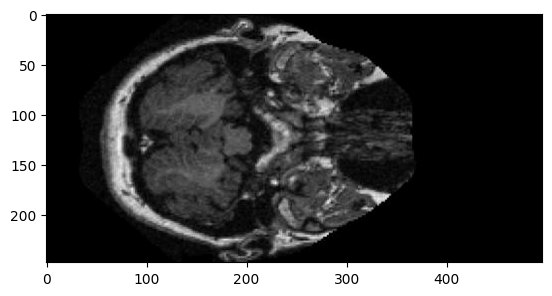

In [21]:
from matplotlib.pyplot import imshow
img = Image.open(r'D:/Sem 4/Bio/Project/Data/Moderate Dementia/OAS1_0308_MR1_mpr-1_101.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))

100.0% Confidence This Is Non Demented


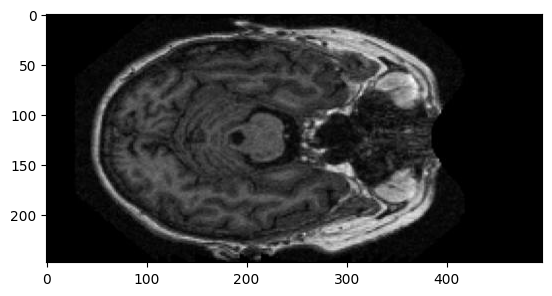

In [22]:
# OAS1_0001_MR1_mpr-1_103
from matplotlib.pyplot import imshow
img = Image.open(r'D:/Sem 4/Bio/Project/Data/Non Demented/OAS1_0001_MR1_mpr-1_103.jpg')
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res=model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100)+ '% Confidence This Is '+ names(classification))